<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-07-01 02:03:44--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.6’

m4_survey_data.sqli 100%[===================>]  34.98M  34.6MB/s    in 1.0s    

2022-07-01 02:03:46 (34.6 MB/s) - ‘m4_survey_data.sqlite.6’ saved [36679680/36679680]



Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Demo: How to run an sql query


In [73]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [175]:
QUERY = """
SELECT Respondent,DevType,count(*)as count
FROM DevType
group by DevType
order by count desc
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df=pd.read_sql_query(QUERY,conn)
df

,Respondent,DevType,count
0,4,"Developer, full-stack",6928
1,9,"Developer, back-end",6290
2,9,"Developer, front-end",3920
3,13,"Developer, desktop or enterprise applications",2575
4,13,"Developer, mobile",1959
5,9,DevOps specialist,1639
6,9,Database administrator,1413
7,13,System administrator,1202
8,20,Designer,988
9,9,"Developer, QA or test",911


## Demo: How to run a group by query


In [8]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by count desc
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,28.0,787
1,25.0,738
2,27.0,724
3,26.0,720
4,29.0,697
5,24.0,679
6,30.0,651
7,23.0,581
8,31.0,531
9,32.0,489


## Demo: How to describe a table


In [9]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


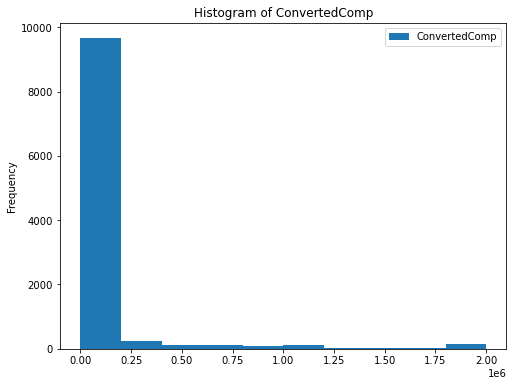

In [5]:

QUERY = """
SELECT ConvertedComp
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

df.plot(kind='hist',figsize=(8,6))
plt.title('Histogram of ConvertedComp')
plt.show()

### Box Plots


Plot a box plot of `Age.`


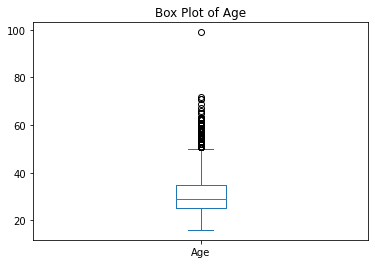

In [6]:

QUERY = """
SELECT Age
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

df.plot(kind='box')
plt.title('Box Plot of Age')
plt.show()



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


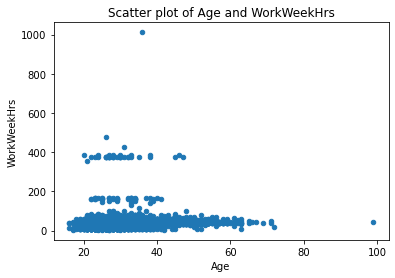

In [8]:
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

df.plot(kind='scatter',y='WorkWeekHrs',x='Age')
plt.title('Scatter plot of Age and WorkWeekHrs')
plt.show()



### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


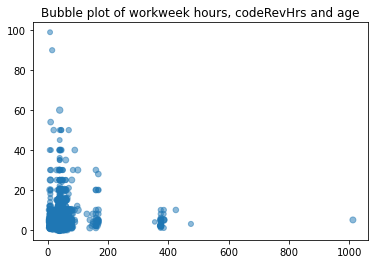

In [9]:
QUERY = """
SELECT WorkWeekHrs,CodeRevHrs,Age
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

plt.scatter(df['WorkWeekHrs'],df['CodeRevHrs'],s=df['Age'],alpha=0.5)
plt.title('Bubble plot of workweek hours, codeRevHrs and age')
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


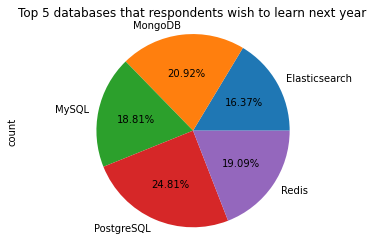

In [10]:
QUERY = """
SELECT DatabaseDesireNextYear,count(*)as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc
"""


df = pd.read_sql_query(QUERY,conn)
df1=df.head()

df1.groupby('DatabaseDesireNextYear').sum().plot(kind='pie',y='count',legend=False ,autopct='%0.2f%%')

plt.title("Top 5 databases that respondents wish to learn next year")
plt.axis('equal')
plt.show()

In [11]:
QUERY = """
SELECT LanguageDesireNextYear,count(*) as count
FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by count desc
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

,LanguageDesireNextYear,count
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [12]:

QUERY = """
SELECT LanguageWorkedWith,count(*) as count
FROM LanguageWorkedWith
group by LanguageWorkedWith

"""
df = pd.read_sql_query(QUERY,conn)
df


,LanguageWorkedWith,count
0,Assembly,437
1,Bash/Shell/PowerShell,4642
2,C,1578
3,C#,4288
4,C++,1946
5,Clojure,164
6,Dart,237
7,Elixir,187
8,Erlang,98
9,F#,158


In [13]:
QUERY = """
SELECT Respondent,DatabaseWorkedWith,count(*) as count
FROM DatabaseWorkedWith
group by Respondent
order by count
"""

df = pd.read_sql_query(QUERY,conn)
df1=df[df['count']==1 ]
df2=df1[df1['DatabaseWorkedWith']=='MySQL']
df2

,Respondent,DatabaseWorkedWith,count
0,25,MySQL,1
15,129,MySQL,1
17,147,MySQL,1
18,148,MySQL,1
25,194,MySQL,1
...,...,...,...
2494,25007,MySQL,1
2497,25012,MySQL,1
2504,25091,MySQL,1
2507,25111,MySQL,1


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


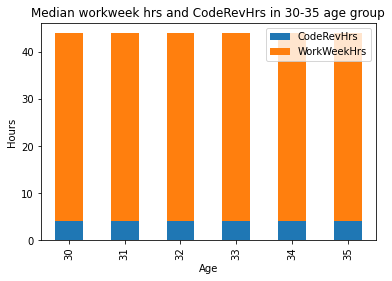

In [14]:

QUERY = """
SELECT CodeRevHrs,WorkWeekHrs,Age
FROM master
WHERE (Age>=30) and (Age<=35)

"""

df = pd.read_sql_query(QUERY,conn)
df['Age']=df['Age'].astype('int')

df.groupby('Age').median().plot(kind='bar',stacked=True)

plt.title('Median workweek hrs and CodeRevHrs in 30-35 age group')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


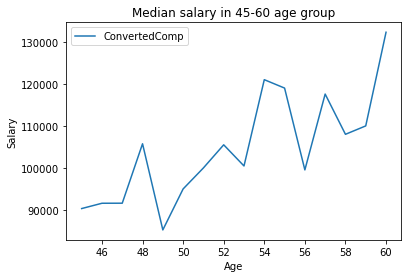

In [15]:
QUERY = """
SELECT ConvertedComp,Age
FROM master
WHERE (Age>=45) and (Age<=60)

"""

df = pd.read_sql_query(QUERY,conn)

df.groupby('Age').median().plot(kind='line')

plt.title('Median salary in 45-60 age group')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



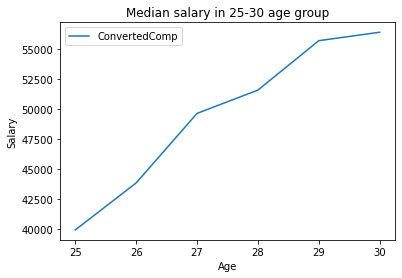

In [16]:
QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE (Age>=25) and (Age<=30)

"""

df = pd.read_sql_query(QUERY,conn)

df.groupby('Age').median().plot(kind='line')

plt.title('Median salary in 25-30 age group')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:title={'center':'A Horizontal bar chart using MainBranch'}>

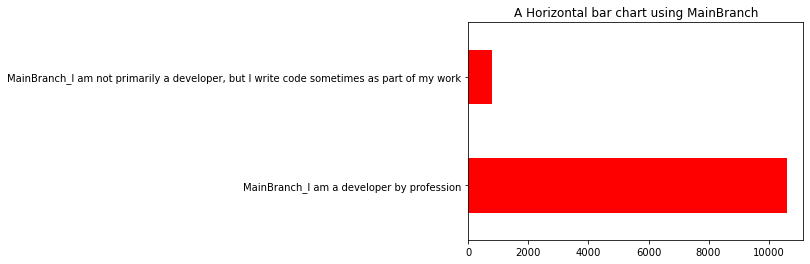

In [17]:

QUERY = """
SELECT MainBranch
FROM master
"""


df = pd.read_sql_query(QUERY,conn)

x=pd.get_dummies(df)

y=x.transpose()
y['Total']=y.sum(axis=1)
y['Total'].plot.barh(title='A Horizontal bar chart using MainBranch', color='Red')


In [18]:
QUERY = """
SELECT DevType,count(*)as count
FROM DevType
group by DevType
order by count desc
"""

df=pd.read_sql_query(QUERY,conn)
df.head()

,DevType,count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


Close the database connection.


In [19]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
